# Keras
Here we'll write the program using Keras machine learning library

In [71]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras.datasets import mnist
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import theano
import time
import pandas as pd
import csv

In [2]:
    (X_train, y_train), (X_test, y_test) = mnist.load_data()

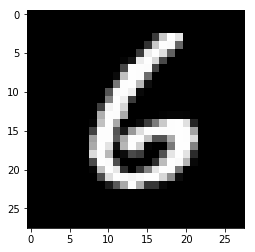

In [3]:
# Visulization of data
plt.imshow(X_train[6000], cmap = 'gray')

In [4]:
X_train = X_train.reshape(X_train.shape[0],28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [5]:
X_test.shape

(10000, 28, 28, 1)

In [6]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_test /= 255
X_train /= 255

In [7]:
print(y_train.shape)
print(y_test.shape[0])

(60000,)
10000


In [26]:
# Convert one dimentional class arrays to 10-dimentional class matrix
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [10]:
y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [11]:
print(y_test.shape)

(10000, 10)


In [117]:
model = Sequential()

In [118]:
# CNN input layer
model.add(Convolution2D(32, 3, 3, activation = 'relu', input_shape = (28, 28, 1)))

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  


In [119]:
print(model.output_shape)

(None, 26, 26, 32)


In [120]:
model.add(Convolution2D(32, 3, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  """Entry point for launching an IPython kernel.


In [121]:
model.add(Convolution2D(100, 3, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(100, (3, 3), activation="relu")`
  """Entry point for launching an IPython kernel.


In [122]:
#Fully connected dense layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [123]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [124]:
model.fit(X_train, y_train, batch_size=32, epochs = 10, verbose = 1)

Epoch 1/10
60000/60000 [==============================] - 194s 3ms/step - loss: 0.2142 - acc: 0.9346
Epoch 2/10
60000/60000 [==============================] - 213s 4ms/step - loss: 0.0821 - acc: 0.9759
Epoch 3/10
60000/60000 [==============================] - 196s 3ms/step - loss: 0.0649 - acc: 0.9802
Epoch 4/10
60000/60000 [==============================] - 194s 3ms/step - loss: 0.0554 - acc: 0.9844
Epoch 5/10
60000/60000 [==============================] - 192s 3ms/step - loss: 0.0488 - acc: 0.9854
Epoch 6/10
60000/60000 [==============================] - 191s 3ms/step - loss: 0.0445 - acc: 0.9866
Epoch 7/10
60000/60000 [==============================] - 194s 3ms/step - loss: 0.0416 - acc: 0.9877
Epoch 8/10
60000/60000 [==============================] - 194s 3ms/step - loss: 0.0384 - acc: 0.9879
Epoch 9/10
60000/60000 [==============================] - 632s 11ms/step - loss: 0.0349 - acc: 0.9895
Epoch 10/10
60000/60000 [==============================] - 193s 3ms/step - loss: 0.0320 - 

In [125]:
score = model.evaluate(X_test, y_test, verbose=0)

In [126]:
print(score)

[0.01811390956151936, 0.9942]


In [127]:
test = pd.read_csv('test.csv', header = 0) # Loading Kaggle Test set

In [128]:
test_np = test.values

In [50]:
print(test.shape)

(28000, 784)


In [129]:
test_np = test_np.reshape(28000, 28, 28, 1)
prediction = model.predict(test_np)
print(prediction.shape)

(28000, 10)


The prediction of my model on kaggle test set is: 5


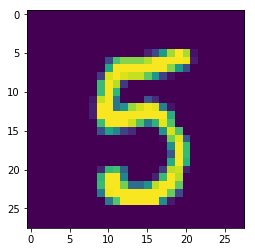

In [130]:
image_num = 10
plt.imshow(test_np[image_num].reshape(28, 28))
print('The prediction of my model on kaggle test set is:',np.argmax(prediction[image_num]))

In [131]:
res = {'ImageId' : 'Label'}
for i in range(len(prediction)):
    res[i+1] = np.argmax(prediction[i])

In [132]:
res_np = np.array(list(res.items()))

In [133]:
print(res_np.shape)
print(type(res_np))
print(res_np)

(28001, 2)
<class 'numpy.ndarray'>
[['ImageId' 'Label']
 ['1' '2']
 ['2' '0']
 ...
 ['27998' '3']
 ['27999' '9']
 ['28000' '2']]


In [134]:
df = pd.DataFrame(res_np)
df.to_csv("sub3.csv", index=False, header = False)

In [28]:
# trial = model.predict(X_test[0])
trial = model.predict(X_test)

The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess 

The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was wrong
The predicted number by CNN is 3
Actual label of the image is 5
The guess was 

The predicted number by CNN is 0
Actual label of the image is 2
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was wrong
The predicted number by CNN is 4
Actual label of the image is 2
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was co

The guess was correct
The guess was wrong
The predicted number by CNN is 0
Actual label of the image is 5
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was 

The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess 

The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess 

The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess 

The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess was correct
The guess 

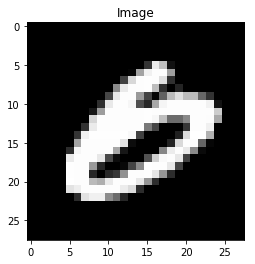

In [50]:
s = 0
for i in range(len(X_test)):
    image_num = i
#     plt.imshow(X_test[image_num].reshape(28,28), cmap = 'gray')
#     plt.title('Image')
    pred = np.argmax(trial[image_num])
    act = np.argmax(y_test[image_num])
#     print('The predicted number by CNN is', pred)
#     print('Actual label of the image is', act)
    if pred == act:
        print('The guess was correct')
    else:
        print('The guess was wrong')
        plt.imshow(X_test[image_num].reshape(28,28), cmap = 'gray')
        plt.title('Image')
        print('The predicted number by CNN is', pred)
        print('Actual label of the image is', act)
        s += 1

In [53]:
print('Number of incorrect guesses = ',s, 'out of', len(X_test))

Number of incorrect guesses =  95 out of 10000
